In [1]:
import pandas as pd
from get_data import get_data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seasons = [i for i in range(1987,2024)]

df = get_data(seasons)


df.head()

c:\Users\USER\Downloads\data science proyects\man_utd_record\get_data.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_df['end_date'].iloc[i] = datetime.today()
c:\Users\USER\Downloads\data science proyects\man_utd_record\get_data.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_df['end_date'].iloc[i] = pd.to_datetime(manager_df['end_date'].iloc[i])


,Date,Match,Result,Score,Competition,manager
0,1986-08-23,Arsenal v Manchester United,L,1-0,League Division One,None
1,1986-08-25,Manchester United v West Ham United,L,2-3,League Division One,None
2,1986-08-30,Manchester United v Charlton Athletic,L,0-1,League Division One,None
3,1986-09-06,Leicester City v Manchester United,D,1-1,League Division One,None
4,1986-09-13,Manchester United v Southampton,W,5-1,League Division One,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 61
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2081 non-null   datetime64[ns]
 1   Match        2081 non-null   object        
 2   Result       2081 non-null   object        
 3   Score        2081 non-null   object        
 4   Competition  2081 non-null   object        
 5   manager      2064 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 113.8+ KB


In [4]:
# since michael carrick and ryan giggs were both interrim managers with less than 10 games played, i'll remove them from the analysis
df1 = df.copy()
df1 = df1.drop(df1[(df.manager == 'Michael Carrick') | (df1.manager == 'Ryan Giggs')].index)
df1['manager'].unique()

array([None, 'Alex Ferguson', 'David Moyes', 'Louis van Gaal',
       'Jose Mourinho', 'Ole Gunnar Solskjaer', 'Ralf Rangnick',
       'Erik ten Hag'], dtype=object)

In [5]:
def split_by_manager(df: pd.DataFrame):
    managers = {}
    
    for manager in df['manager'].unique():
        managers[manager] = df[df['manager'] == manager]
    
    return managers

managers = split_by_manager(df1)

In [6]:
win_ratio_df = pd.DataFrame(columns='manager result_count'.split(" "))

for manager in managers.keys():
    temp_df = pd.DataFrame(data = [i for i in managers[manager]['Result'].value_counts()],
             index = ['W', 'L', 'D'],
             columns=['result_count'])
    
    temp_df['manager'] = manager
    temp_df.reset_index(inplace=True)
    
    win_ratio_df = pd.concat([win_ratio_df,temp_df])
    

win_ratio_df.reset_index(drop=True,inplace=True)
win_ratio_df.head()

# Calculate total count by manager
total_count_by_manager = win_ratio_df.groupby('manager')['result_count'].transform('sum')

# Calculate result_percent
win_ratio_df['result_percent'] = win_ratio_df['result_count'] / total_count_by_manager * 100
win_ratio_df['total_count_by_manager'] = total_count_by_manager


win_ratio_df.head()


,manager,result_count,index,result_percent,total_count_by_manager
0,None,NaN,W,NaN,NaN
1,None,NaN,L,NaN,NaN
2,None,NaN,D,NaN,NaN
3,Alex Ferguson,817,W,60.924683,1341
4,Alex Ferguson,296,L,22.07308,1341


<Axes: xlabel='index', ylabel='result_percent'>

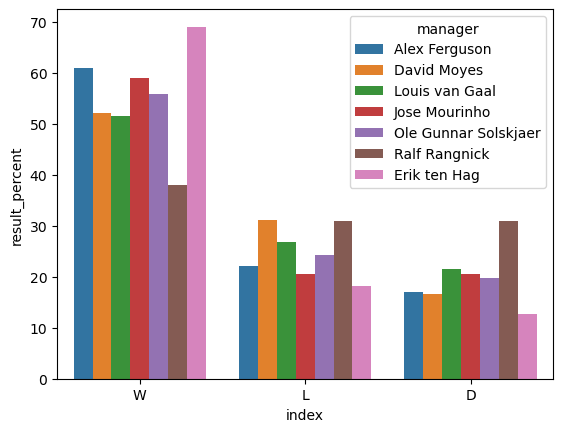

In [7]:
sns.barplot(data=win_ratio_df,
            x='index',
            y='result_percent',
            hue='manager')

<Axes: xlabel='total_count_by_manager', ylabel='result_percent'>

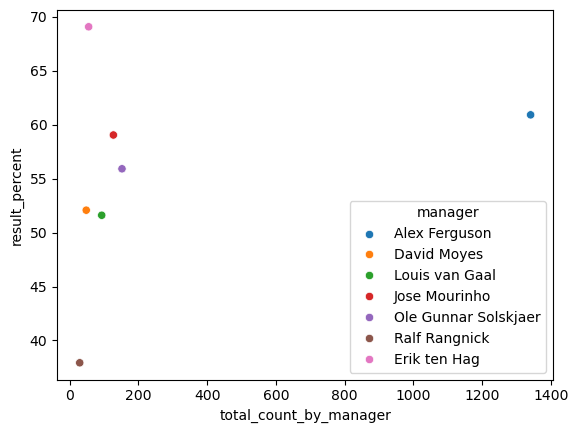

In [8]:
sns.scatterplot(data=win_ratio_df[win_ratio_df['index'] == 'W'],
                x='total_count_by_manager',
                y='result_percent',
                hue='manager')